In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression

![https://www.machinelearningplus.com/wp-content/uploads/2021/06/formula-and-interpretation-for-evaluation-metrics.jpg?ezimgfmt=ng:webp/ngcb7](https://www.machinelearningplus.com/wp-content/uploads/2021/06/formula-and-interpretation-for-evaluation-metrics.jpg?ezimgfmt=ng:webp/ngcb7)

In [2]:
sns.set()

In [3]:
os.listdir("GiveMeSomeCredit")

['sampleEntry.csv', 'cs-test.csv', 'Data Dictionary.xls', 'cs-training.csv']

In [4]:
df = pd.read_csv("GiveMeSomeCredit/cs-training.csv")

In [5]:
df.head()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [7]:
df_true = df[df["SeriousDlqin2yrs"] == 1]

df_false = df[df["SeriousDlqin2yrs"] == 0].sample(n=len(df_true))

In [8]:
df = pd.concat([df_true, df_false])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

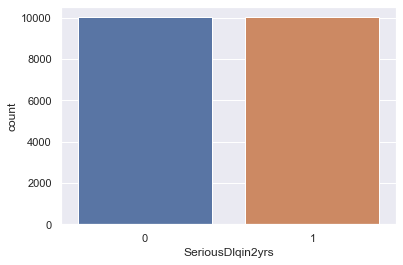

In [9]:
sns.countplot(df.iloc[:,1])

In [10]:
df = df.dropna()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:],df.iloc[:,1])

In [12]:
regressor = LogisticRegression()

In [13]:
regressor.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_test_pred = regressor.predict_proba(X_test)[:,1]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

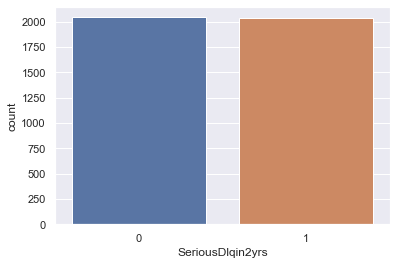

In [15]:
sns.countplot(y_test)

In [16]:
mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>

In [17]:
def ResidualErrors(y_pred, y_real, y_benchmark = None):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
    
    MSE = mean_squared_error(y_pred, y_real)
    MAE = mean_absolute_error(y_pred, y_real)
    MSLE = mean_squared_log_error(y_pred, y_real)
    RMSE = np.sqrt(MSE)
    RMSLE = np.sqrt(MSLE)
    R2 = r2_score(y_pred, y_real)
    R2_benchmark = None
    
    if(y_benchmark is not None):
        R2_benchmark = mean_squared_error(y_pred,y_real) / mean_squared_error(y_benchmark,y_real)
        
    return {
        "MSE":MSE,
        "MAE":MAE,
        "MSLE":MSLE,
        "RMSE":RMSE,
        "RMSLE":RMSLE,
        "R2":R2,
        "R2_BENCH":R2_benchmark
    }

In [18]:
ResidualErrors(y_test_pred, y_test)

{'MSE': 0.17977224035030917,
 'MAE': 0.37292883445295505,
 'MSLE': 0.08896839279656066,
 'RMSE': 0.4239955664276564,
 'RMSLE': 0.2982756993061296,
 'R2': -2.1629143669144355,
 'R2_BENCH': None}

# MSE

In [19]:
y_test_pred

array([0.63454508, 0.24560258, 0.58729446, ..., 0.38292882, 0.25750177,
       0.25076805])

In [20]:
np.mean((y_test_pred - y_test) ** 2)

0.17977224035030917

In [21]:
mean_squared_error(y_test, y_test_pred)

0.17977224035030917

# MAE

In [22]:
np.mean(np.abs(y_test_pred - y_test))

0.37292883445295505

In [23]:
mean_absolute_error(y_test, y_test_pred)

0.37292883445295505

# RMSE

In [24]:
np.sqrt(np.mean((y_test_pred - y_test) ** 2))

0.4239955664276564

In [25]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

0.4239955664276564

# R2

In [26]:
r2 = 1 - sum((y_test_pred - y_test)**2) / sum((y_test-np.mean(y_test))**2)
r2

0.28090948499571866

In [27]:
r2_score(y_test,y_test_pred)

0.28090948499573076

## Bad Rate

In [28]:
from IPython.display import display, Markdown, Latex
sns.set_palette("flare_r")
sns.set_palette("deep")

def ConcordantRatio(y_test_pred, y_test):
    i = (y_test * (1-y_test_pred)) + ((1-y_test) * (y_test_pred))
    concordant = i < (np.max(y_test_pred)/2)
    return np.mean(concordant)

def caio_roc_curve(y_real, y_proba, deciles):
    sensitivity = []
    specificity = []
    precision = []
    threshold = []
    f1 = []

    for i in deciles:
        cutoff = i
        p = y_proba > cutoff

        metrics = ClassificationMetrics(p, y_real)

        sensitivity.append(metrics["recall"]) #same as recall
        specificity.append(metrics["specificity"])
        precision.append(metrics["precision"])
        f1.append(metrics["f1"])
        threshold.append(cutoff)

    return sensitivity, specificity, precision, f1, threshold


def ResidualMetrics(y_pred, y_real, y_benchmark = None):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
    
    MSE = mean_squared_error(y_pred, y_real)
    MAE = mean_absolute_error(y_pred, y_real)
    MSLE = mean_squared_log_error(y_pred, y_real)
    RMSE = np.sqrt(MSE)
    RMSLE = np.sqrt(MSLE)
    R2 = r2_score(y_pred, y_real)
    R2_benchmark = None
    
    if(y_benchmark is not None):
        R2_benchmark = mean_squared_error(y_pred,y_real) / mean_squared_error(y_benchmark,y_real)
        
    return {
        "MSE":MSE,
        "MAE":MAE,
        "MSLE":MSLE,
        "RMSE":RMSE,
        "RMSLE":RMSLE,
        "R2":R2,
        "R2_BENCH":R2_benchmark
    }


def ClassificationMetrics(y_pred,y_real):
    tp = np.sum((y_pred == 1) & (y_real == 1))
    tn = np.sum((y_pred == 0) & (y_real == 0))
    fn = np.sum((y_pred == 0) & (y_real == 1))
    fp = np.sum((y_pred == 1) & (y_real == 0))
    recall = tp / (tp + fn)
    specificity = fp / (fp + tn)
    precision =tp / (tp + fp)
    f1 = 2 * ((precision*recall) / (precision+recall))

    return {
        "recall":recall,
        "specificity":specificity,
        "precision":precision,
        "f1":f1
    }


def ModelMetrics(y_proba, y_real, bins=100):
    display(Markdown('## proba distribution'))
    plt.figure(figsize=(20,5))
    sns.displot(y_proba, height=5, aspect=3);
    plt.show()
    
    df = pd.DataFrame({"pred":y_proba, "real":y_real})
    df = df.sort_values("pred", ascending=False)
    q = np.multiply(list(range(1,bins)), int(100/bins))
    deciles = list(np.percentile(df.pred, q=q))
    df["decile"] = 1
    df["contagem"] = 1
    for i in range(len(deciles)):
        df.loc[df.pred > deciles[i],"decile"] = i+2

    result = df.groupby(["decile"]).agg({"real":"sum", "contagem":"count"})
    result = result.rename(columns={"real":"true"})
    deciles = [0]+deciles
    result["threshold"] = np.float64(deciles)
    result["false"] = result["contagem"]-result["true"]

    result["bad_rate"] = result.true / np.sum(result["contagem"])
    result["good_rate"] = result.false / np.sum(result["contagem"])
    result["bad_rate_cum"] = np.cumsum(result.bad_rate)
    result["good_rate_cum"] = np.cumsum(result.good_rate)
    result["ks"] = np.abs(result.good_rate_cum - result.bad_rate_cum)
    
    best_ks = result[result.index == result.ks.sort_values(ascending=False).index[0]]
    ks_decile = best_ks.index.values[0]
    ks_threshold = best_ks.threshold.values[0]
    
    display(Markdown('## Bad Rate and KS analysis'))
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))

    sns.lineplot(data=result, x="decile", y="bad_rate_cum", ax=ax1, label="bad rate")
    sns.lineplot(data=result, x="decile", y="good_rate_cum", ax=ax1, label="good rate")
    x1, y1 = [ks_decile, ks_decile], [best_ks["bad_rate_cum"].values[0], best_ks["good_rate_cum"].values[0]]
    ax1.plot(x1, y1, marker = 'o', label=f"ks {round(best_ks.ks.values[0], 2)} - decile {round(ks_decile,2)}")
    ax1.legend(loc=4)

    sns.lineplot(data=result, x="threshold", y="bad_rate_cum", ax=ax2, label="bad rate")
    sns.lineplot(data=result, x="threshold", y="good_rate_cum", ax=ax2, label="good rate")
    x1, y1 = [ks_threshold, ks_threshold], [best_ks["bad_rate_cum"].values[0], best_ks["good_rate_cum"].values[0]]
    ax2.plot(x1, y1, marker = 'o', label=f"ks {round(best_ks.ks.values[0], 2)} - threshold {round(ks_threshold,2)}")
    ax2.legend(loc=4)
    plt.show()
    
    display(Markdown('## ROC/PR Curve & AUC '))
    display(Markdown("However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. […] Precision-Recall (PR) curves, often used in Information Retrieval , have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution."))

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
    sensitivity = []
    specificity = []
    _auc = roc_auc_score(df.real, df.pred)
    gini = 2 * _auc - 1
    sensitivity, specificity, precision, f1, threshold = caio_roc_curve(df.real, df.pred, deciles)
    res_roc = pd.DataFrame({"specificity":specificity, "sensitivity":sensitivity, "precision":precision, "f1_score":f1, "threshold":threshold})
    res_roc["peak_precision"] = (res_roc.precision+res_roc.specificity)
    res_roc["peak_sensitivity"] = (res_roc.sensitivity+res_roc.specificity) - res_roc.specificity*2
    #***
    roc_auc = auc(res_roc.specificity, res_roc.sensitivity)
    pr_auc = auc(res_roc.specificity, res_roc.precision)
    
    best_precision = res_roc[res_roc.f1_score == np.max(res_roc.f1_score)]
    best_sensitivity = res_roc[res_roc.peak_sensitivity == np.max(res_roc.peak_sensitivity)]
    
    
    sns.lineplot(data=res_roc, x="specificity", y="sensitivity", label=f"ROC Curve", ax=ax1)
    sns.lineplot(data=res_roc, x="specificity", y="specificity", linestyle='--', label="Random", ax=ax1)
    x1, y1 = [best_sensitivity.specificity.values[0], best_sensitivity.specificity.values[0]], [best_sensitivity.sensitivity.values[0], best_sensitivity.specificity.values[0]]
    ax1.plot(x1, y1, marker = 'o', label=f"tpr={round(best_sensitivity.sensitivity.values[0],2)} fpr={round(best_sensitivity.specificity.values[0],2)} threshold={round(best_sensitivity.threshold.values[0],2)}")
    ax1.fill_between(res_roc.specificity, res_roc.sensitivity, res_roc.specificity, alpha=.1, label = f"AUC = {round(roc_auc,2)}")
    ax1.set_title("ROC Curve")
    ax1.legend(loc=4)
    
    
    sns.lineplot(data=res_roc, x="specificity", y="precision", label=f"PR Curve", ax=ax2)
    sns.lineplot(x=res_roc.specificity, y=[0.5]*len(res_roc), label=f"Random", linestyle='--', ax=ax2)
    x1, y1 = [best_precision.specificity.values[0], best_precision.specificity.values[0]], [best_precision.precision.values[0], np.min(res_roc.precision)]
    ax2.plot(x1, y1, marker = 'o', label=f"precision={round(best_precision.precision.values[0],2)} fpr={round(best_precision.specificity.values[0],2)} F1={round(best_precision.f1_score.values[0],2)} threshold={round(best_precision.threshold.values[0],2)}")
    ax2.fill_between(res_roc.specificity, res_roc.precision, 0.5, alpha=.1, label = f"AUC = {round(pr_auc,2)}")
    ax2.legend(loc=1)
    ax2.set_title("Precision Recall Curve")
    plt.show()
    
    if(_auc >= 0.9):
        print("auc >= 90, which is an Excelent Rate")
    elif(_auc >= 0.8):
        print("auc >= 80, which is a good Rate")
    elif(_auc >= 0.7):
        print("auc >= 70, which is a fair Rate")
    elif(_auc >= 0.6):
        print("auc >= 60, which is a poor Rate")
    else:
        print("auc < 60, which is a fail")
        
    concordant_metric = ConcordantRatio(y_proba, y_real)
    
    return {
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "concordance_ratio":concordant_metric,
        "deciles_df": pd.concat([result.reset_index(),res_roc], axis=1),
    }

## proba distribution

<Figure size 1440x360 with 0 Axes>

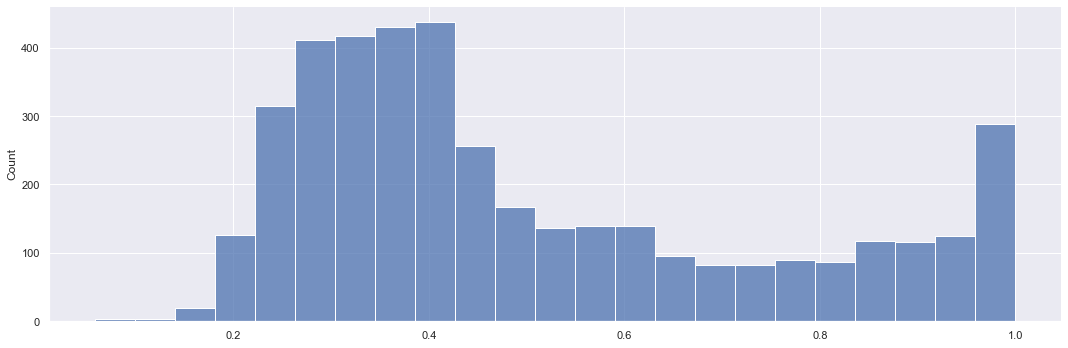

## Bad Rate and KS analysis

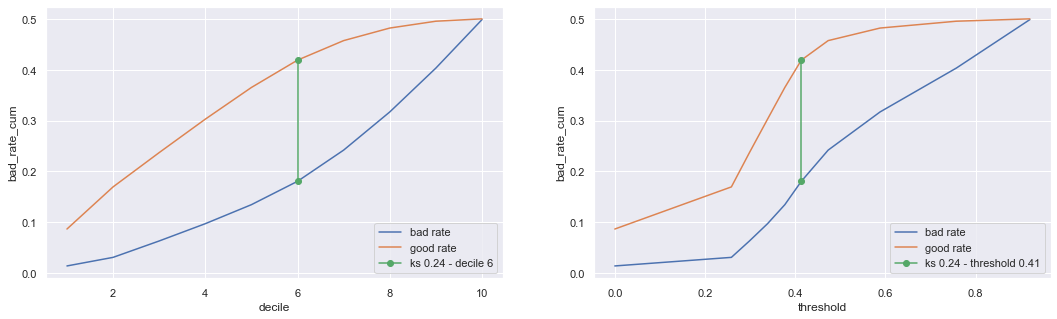

## ROC/PR Curve & AUC 

However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. […] Precision-Recall (PR) curves, often used in Information Retrieval , have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution.

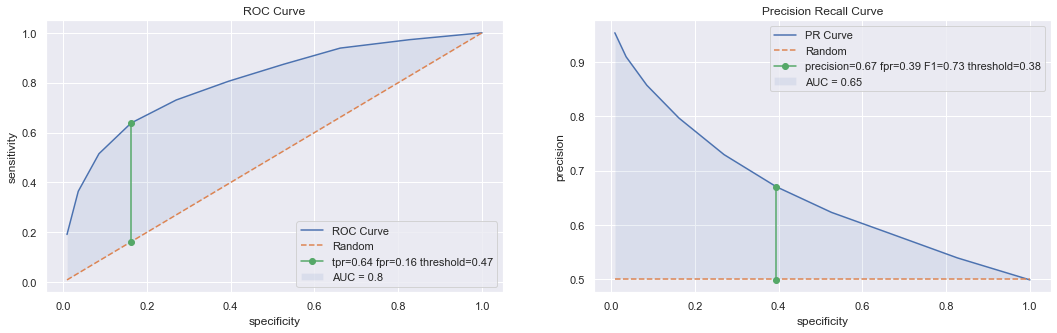

auc >= 80, which is a good Rate


In [29]:
resultado = ModelMetrics(y_test_pred, y_test, 10)

In [30]:
resultado

{'roc_auc': 0.8047340261067122,
 'pr_auc': 0.6515182217008664,
 'concordance_ratio': 0.7373836354728075,
 'deciles_df':    decile  true  contagem  threshold  false  bad_rate  good_rate  \
 0       1    56       409   0.000000    353  0.013719   0.086477   
 1       2    69       408   0.258438    339  0.016903   0.083048   
 2       3   132       408   0.298507    276  0.032337   0.067614   
 3       4   139       408   0.338606    269  0.034052   0.065899   
 4       5   153       408   0.376946    255  0.037482   0.062469   
 5       6   188       408   0.413508    220  0.046056   0.053895   
 6       7   251       408   0.473016    157  0.061489   0.038462   
 7       8   307       408   0.588054    101  0.075208   0.024743   
 8       9   353       408   0.757163     55  0.086477   0.013474   
 9      10   390       409   0.920135     19  0.095541   0.004655   
 
    bad_rate_cum  good_rate_cum        ks  specificity  sensitivity  precision  \
 0      0.013719       0.086477  0.072